In [2]:
import os
import docx
import numpy as np
import pandas as pd

In [3]:
def extract_docx_text(docx_path):
    try:
        doc = docx.Document(docx_path)
        text = ''
        for para in doc.paragraphs:
            text += para.text + '\n'
        return text.strip()
    except Exception as e:
        print(f"Error reading .docx file {docx_path}: {e}")
        return ''
def extract_doc_text(doc_path):
    try:
        import win32com.client
        word = win32com.client.Dispatch("Word.Application")
        doc = word.Documents.Open(doc_path)
        text = doc.Content.Text
        doc.Close()
        word.Quit()
        return text.strip()
    except Exception as e:
        print(f"Error reading .doc file {doc_path}: {e}")
        return ''

In [4]:
folder_path = r'C:\Users\Suresh\Downloads\P548_dataset\P-344 Dataset'
file_names = []
job_roles = []
content_list = []

In [5]:
for roots,dirs, files in os.walk(folder_path):
    for file_name in files:
        file_path = os.path.join(roots, file_name)
        file_extension = os.path.splitext(file_name)[-1].lower()  
        if not file_extension:
            print(f"Warning: {file_name} doesn't have an extension, assuming it's a .docx file.")
            file_extension = '.docx'
            file_name = file_name + '.docx'
            file_path = os.path.join(roots, file_name) 
        job_role = os.path.basename(roots)
        print(f"Processing file: {file_name} (Extension: {file_extension}) in Job Role: {job_role}")# Only process .docx and .doc files
        if file_extension == '.docx':
            content = extract_docx_text(file_path)
            if content:  
                file_names.append(file_name)
                job_roles.append(job_role)
                content_list.append(content)
            else:
                print(f"Warning: No content extracted from {file_name}")
            
        elif file_extension == '.doc':
            content = extract_doc_text(file_path)
            if content:
                file_names.append(file_name)
                job_roles.append(job_role)
                content_list.append(content)
            else:
                print(f"Warning: No content extracted from {file_name}")
if not file_names:
    print("No files processed successfully. Please check if files are in the correct format.")
else:
    df = pd.DataFrame({'file_name': file_names,'jobrole': job_roles,  'content': content_list})

Processing file: Peoplesoft Admin_G Ananda Rayudu.docx (Extension: .docx) in Job Role: Peoplesoft
Error reading .docx file C:\Users\Suresh\Downloads\P548_dataset\P-344 Dataset\Resumes_Docx\Peoplesoft\Peoplesoft Admin_G Ananda Rayudu.docx: "no relationship of type 'http://schemas.openxmlformats.org/officeDocument/2006/relationships/officeDocument' in collection"
Processing file: Peoplesoft Admin_AnubhavSingh.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_G Ananda Rayudu.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Gangareddy.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Murali.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_Priyanka Ramadoss.doc (Extension: .doc) in Job Role: Peoplesoft Resume
Processing file: Peoplesoft Admin_SirazuddinMohammad.docx (Extension: .docx) in Job Role: Peoplesoft Resume
Processing file: Peoples

In [9]:
df.to_csv('Combined_Resumes.csv', index=False)
print("Content extracted and saved to 'Combined_Resumes.csv'")

Content extracted and saved to 'Combined_Resumes.csv'


In [10]:
df.head()

file_name            jobrole  \
0      Peoplesoft Admin_AnubhavSingh.docx  Peoplesoft Resume   
1    Peoplesoft Admin_G Ananda Rayudu.doc  Peoplesoft Resume   
2         Peoplesoft Admin_Gangareddy.doc  Peoplesoft Resume   
3            Peoplesoft Admin_Murali.docx  Peoplesoft Resume   
4  Peoplesoft Admin_Priyanka Ramadoss.doc  Peoplesoft Resume   

                                             content  
0  Anubhav Kumar Singh\t\t\n\n  To work in a glob...  
1  Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...  
2  PeopleSoft Database Administrator\r           ...  
3  Murali\n\nExperience Summary \n\nI have 6 year...  
4  Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...

In [11]:
df['jobrole'].unique()

array(['Peoplesoft Resume', 'React Developer', 'SQL Developer', 'workday'],
      dtype=object)

In [12]:
df['file_name'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Peoplesoft Admin_AnubhavSingh.docx
1       Peoplesoft Admin_G Ananda Rayudu.doc
2            Peoplesoft Admin_Gangareddy.doc
3               Peoplesoft Admin_Murali.docx
4     Peoplesoft Admin_Priyanka Ramadoss.doc
                       ...                  
73                Sri Krishna S_Hexaware.doc
74                    Srikanth-Hexaware.docx
75                     SSKumar_Hexaware.docx
76              Venkateswarlu B_Hexaware.doc
77                 Vinay Kumar_Hexaware.docx
Name: file_name, Length: 78, dtype: object>

In [13]:
df['content'].iloc[:4]

0    Anubhav Kumar Singh\t\t\n\n  To work in a glob...
1    Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...
2    PeopleSoft Database Administrator\r           ...
3    Murali\n\nExperience Summary \n\nI have 6 year...
Name: content, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  78 non-null     object
 1   jobrole    78 non-null     object
 2   content    78 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [15]:
df.isnull().sum()

file_name    0
jobrole      0
content      0
dtype: int64

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower().strip()
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove punctuation/numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

In [17]:
df['clean_text'] = df['content'].apply(preprocess_text)

In [18]:
print(df['clean_text'][0])

anubhav kumar singh work globally competitive environment challenging assignment shall yield twin benefit job satisfaction steady paced professional growth professional experience current hcl current role system admin offshore skill shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environment along support environment installed linux window o involved day day activity project migration database refresh system admin change tax update etc troubleshooting various server like application server web server process scheduler server applying tuxedo weblogic middleware cpu patch various application working shell scripting used integration method exchange file external system installation troubleshooting tier setup per requirement reviewing vulnerability reported security team renewal ssl weblogic vulnerability remediation whenever vulnerability report rmis team worked pum peoplesoft update manager installation dpk working knowledge ansib

In [19]:
df['content_word_count'] = df['content'].str.split().apply(len)

In [20]:
df['word_count'] = df['clean_text'].str.split().apply(len)

In [21]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

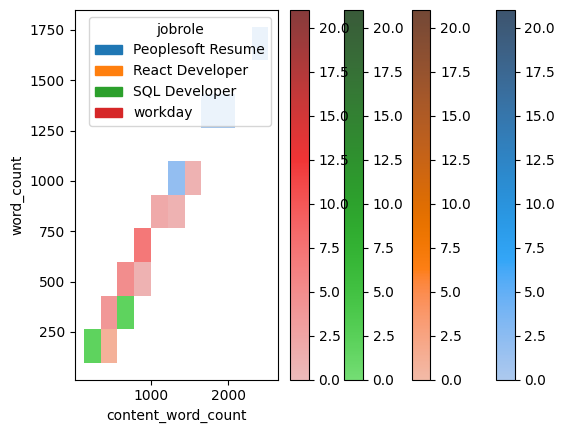

In [22]:
sns.histplot(data=df,x='content_word_count',y='word_count',hue='jobrole',cbar=True,multiple='dodge')
plt.show()

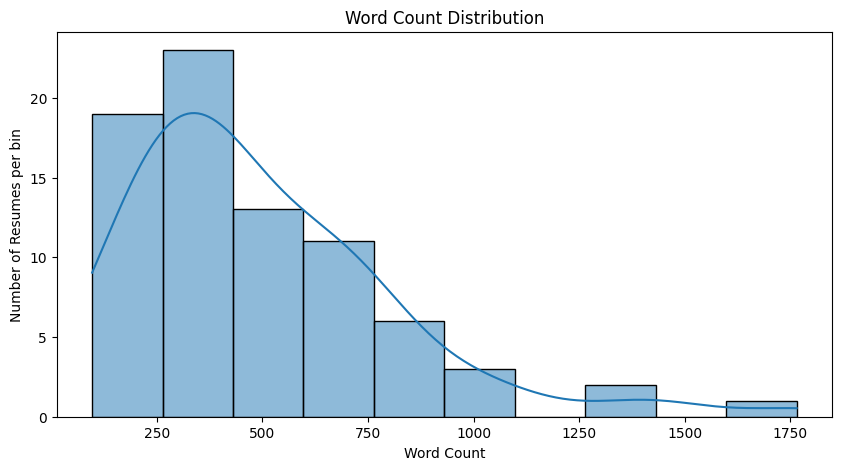

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Number of Resumes per bin")
plt.show()

<Axes: >

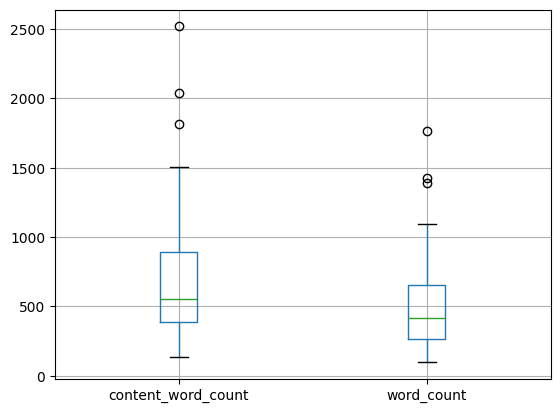

In [24]:
df.boxplot()

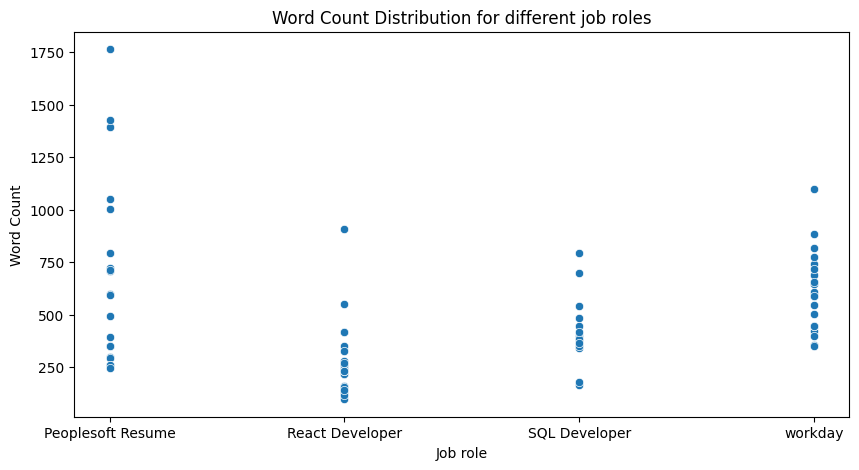

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,x='jobrole',y='word_count')
plt.title("Word Count Distribution for different job roles")
plt.ylabel("Word Count")
plt.xlabel("Job role")
plt.show()

In [26]:
all_text = ' '.join(df['content'].dropna().astype(str))

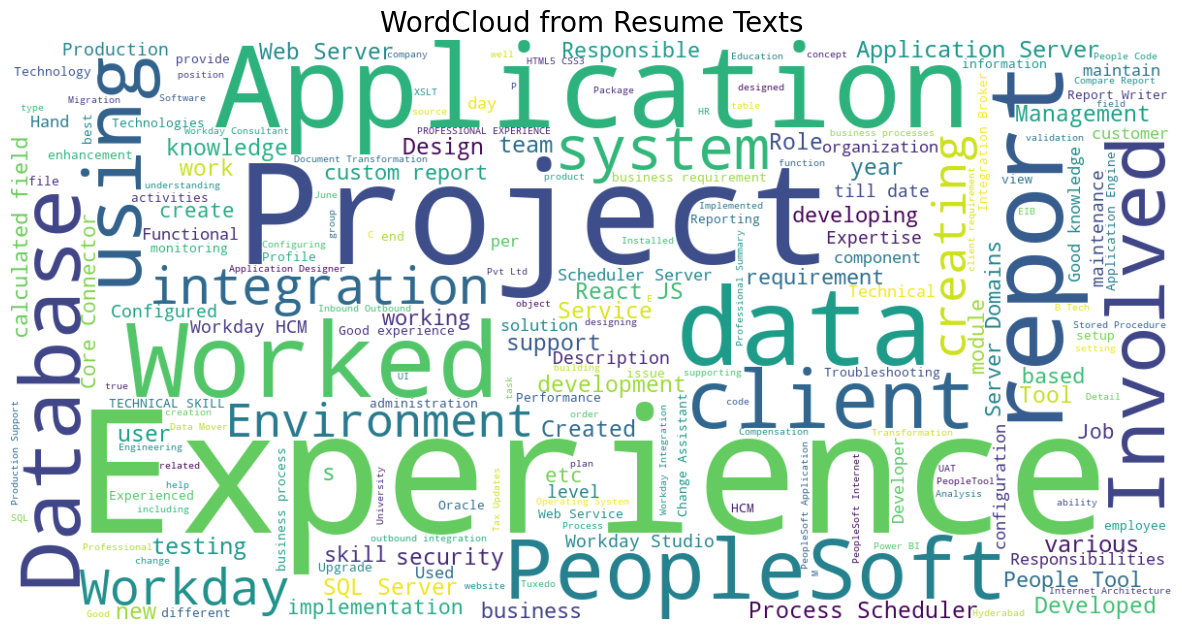

In [27]:
wordcloud = WordCloud(width=1200,height=600,background_color='white',max_words=200,colormap='viridis').generate(all_text)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud from Resume Texts", fontsize=20)
plt.show()

In [135]:
model = df.copy()

In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
le = LabelEncoder()

In [138]:
model['encode'] = le.fit_transform(df['jobrole'])

In [139]:
model['encode']

0     0
1     0
2     0
3     0
4     0
     ..
73    3
74    3
75    3
76    3
77    3
Name: encode, Length: 78, dtype: int64

In [33]:
model.head(30)

file_name            jobrole  \
0                  Peoplesoft Admin_AnubhavSingh.docx  Peoplesoft Resume   
1                Peoplesoft Admin_G Ananda Rayudu.doc  Peoplesoft Resume   
2                     Peoplesoft Admin_Gangareddy.doc  Peoplesoft Resume   
3                        Peoplesoft Admin_Murali.docx  Peoplesoft Resume   
4              Peoplesoft Admin_Priyanka Ramadoss.doc  Peoplesoft Resume   
5            Peoplesoft Admin_SirazuddinMohammad.docx  Peoplesoft Resume   
6                   Peoplesoft Admin_srinivasarao.doc  Peoplesoft Resume   
7                 Peoplesoft Admin_Varkala Vikas.docx  Peoplesoft Resume   
8                   Peoplesoft Admin_Vinod Akkala.doc  Peoplesoft Resume   
9                    PeopleSoft DBA_Ganesh Alladi.doc  Peoplesoft Resume   
10              PeopleSoft DBA_Vivekanand Sayana.docx  Peoplesoft Resume   
11                   Peoplesoft Finance_Arun Venu.doc  Peoplesoft Resume   
12               Peoplesoft Finance_Pritam Biswas.doc  Peoplesoft Resume   
13                 Peoplesoft Finance_Rahul Ahuja.doc  Peoplesoft Resume   
14                  Peoplesoft FSCM_HariNarayana.docx  Peoplesoft Resume   
15                        Peoplesoft FSCM_Murali.docx  Peoplesoft Resume   
16                Peoplesoft FSCM_PriyabrataHota.docx  Peoplesoft Resume   
17                        Peoplesoft FSCM_R Ahmed.doc  Peoplesoft Resume   
18                       Peoplesoft FSCM_SUJATHA.docx  Peoplesoft Resume   
19          Resume_Subha Santosh_Peoplesoft FSCM.docx  Peoplesoft Resume   
20   Internship_Ravali_Musquare Technologies (1).docx    React Developer   
21  Internship_Susovan Bag_Musquare Technologies.docx    React Developer   
22                   React Developer_Deepakreddy.docx    React Developer   
23                     React Developer_Haripriya.docx    React Developer   
24               React Developer_Kamalakar Reddy.docx    React Developer   
25                  React Developer_Naveen sadhu.docx    React Developer   
26                   React Developer_PavasGoswami.doc    React Developer   
27                       React Developer_Pragnya.docx    React Developer   
28       React Developer_Sarala Madasu-converted.docx    React Developer   
29                React Developer_Thirupathiamma.docx    React Developer   

                                              content  \
0   Anubhav Kumar Singh\t\t\n\n  To work in a glob...   
1   Profile Summary:\t\t\t\t\t\t\t\t\t\t\r7+ years...   
2   PeopleSoft Database Administrator\r           ...   
3   Murali\n\nExperience Summary \n\nI have 6 year...   
4   Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...   
5   PROFILE SUMMARY\n\nI have overall 6.8 years’ e...   
6   PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...   
7   PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obje...   
8   Vinod Akkala                                  ...   
9   PeopleSoft Admin/PeopleSoft DBA\r\rGanesh Alla...   
10  PeopleSoft Administration\n \nVivekanand Sayan...   
11  Arun Venu\r\r  EXPERIENCE SUMMARY\t\r\rExperie...   
12  Personal Details\t\t\r\rName\rPritam Biswas...   
13  Rahul Ahuja\r---------------------------------...   
14  Having 4.6 years of experience in PeopleSoft a...   
15  Having 4.6 years of experience in PeopleSoft a...   
16  CAREER OBJECTIVE\t\t\n\nPursuing Peoplesoft Ex...   
17  R Ahmed                                       ...   
18  Tanna Sujatha \n\n\n\nOBJECTIVE\nSeeking a cha...   
19  C O N T A C T :\n\nAddress: Manyata Tech Park,...   
20  Name: Ravali P \n\n                           ...   
21  SUSOVAN  BAG   \nSeeking  a  challenging  posi...   
22  Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...   
23  HARIPRIYA BATTINA \nExperience as UI Developer...   
24  KAMALAKAR REDDY. A \nLinked In: https://www.li...   
25  Naveen Sadhu\n\n\nTitle: software developer\t\...   
26  \r\r
PROFILE\rSearching for the opportunity ...   
27  PRAGNYA PATTNAIK\n \n \n \n Expertise: \n \nHa...   
28   204,Sri geethika prestige,ro

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

In [35]:
### Bag of words technique 

In [36]:
cntvect = CountVectorizer()

In [37]:
BoW = cntvect.fit_transform(model['clean_text'])
print(BoW.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [38]:
tfidf_trans = TfidfTransformer()

In [39]:
BoW_trans = tfidf_trans.fit_transform(BoW)
print(BoW_trans)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18285 stored elements and shape (78, 3883)>
  Coords	Values
  (0, 9)	0.0338259835766171
  (0, 15)	0.07900103219502304
  (0, 45)	0.03701854276338478
  (0, 64)	0.11270615871758938
  (0, 67)	0.03089305495418001
  (0, 69)	0.07513743914505959
  (0, 131)	0.023798234383048966
  (0, 139)	0.02881210897983303
  (0, 184)	0.16912991788308548
  (0, 188)	0.0338259835766171
  (0, 196)	0.037568719572529795
  (0, 200)	0.22465661371217469
  (0, 206)	0.14605714032428313
  (0, 231)	0.04944248179385989
  (0, 258)	0.024764132645539828
  (0, 262)	0.06259591728183563
  (0, 292)	0.02881210897983303
  (0, 296)	0.08159400564865858
  (0, 316)	0.0713947031491469
  (0, 352)	0.02218412728610213
  (0, 374)	0.016817329426318674
  (0, 423)	0.03089305495418001
  (0, 449)	0.03850239732733008
  (0, 450)	0.02294625173495886
  (0, 457)	0.01925119866366504
  :	:
  (77, 3585)	0.0688793186244337
  (77, 3600)	0.024170408996955953
  (77, 3612)	0.050928503650136826
  (

In [40]:
tfidf  = TfidfVectorizer()

In [41]:
features = tfidf.fit_transform(model['clean_text'])
print(features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18285 stored elements and shape (78, 3883)>
  Coords	Values
  (0, 188)	0.033825983576617105
  (0, 1902)	0.02379823438304897
  (0, 3179)	0.030893054954180016
  (0, 3831)	0.009985573918953638
  (0, 1467)	0.030893054954180016
  (0, 660)	0.030893054954180016
  (0, 1183)	0.14286800104713082
  (0, 553)	0.020286317473682754
  (0, 258)	0.024764132645539835
  (0, 3128)	0.030893054954180016
  (0, 3870)	0.033825983576617105
  (0, 3608)	0.033825983576617105
  (0, 374)	0.016817329426318677
  (0, 1838)	0.05419159456873152
  (0, 3029)	0.02587918035739595
  (0, 3313)	0.033825983576617105
  (0, 2430)	0.033825983576617105
  (0, 2678)	0.01893735214697436
  (0, 1516)	0.0187843597862649
  (0, 1248)	0.04508119878718877
  (0, 835)	0.03586475427634959
  (0, 1553)	0.033825983576617105
  (0, 2987)	0.047972395527725545
  (0, 3419)	0.05120414427239287
  (0, 64)	0.11270615871758939
  :	:
  (77, 3834)	0.3637290503746394
  (77, 2411)	0.028550430443332213


In [42]:
target = model['encode']

In [43]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,train_size=0.80,random_state=100,stratify=target)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(62, 3883)
(16, 3883)
(62,)
(16,)


### Model building 

### 1) KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=15,p=2,leaf_size=2)

In [48]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=15)

In [49]:
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

[0 3 2 0 2 3 1 1 1 0 2 3 1 0 1 3]


In [50]:
from sklearn.metrics import accuracy_score, classification_report

In [51]:
### Evaluation metrics for KNN:

In [52]:
### 1) Testing Accuracy_Score:

print(accuracy_score(Y_test,y_pred_knn))

1.0


In [53]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,matthews_corrcoef,cohen_kappa_score

In [54]:
### 2) classification Report:

print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



[[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(0.5, 1.0, 'Confusion matrix plot')

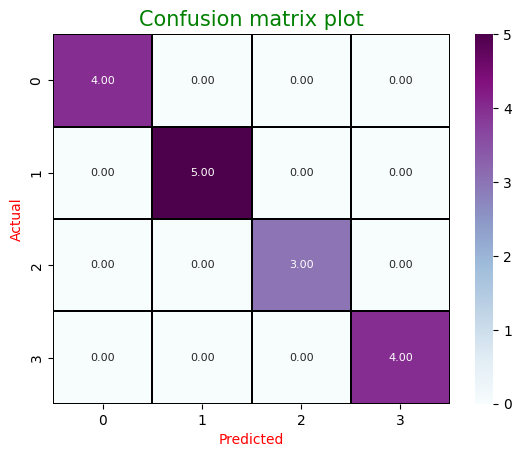

In [55]:
### 2) confusion matrix:

CMK = confusion_matrix(Y_test,y_pred_knn)
print(CMK)

### plotting confusion matrix

sns.heatmap(CMK,annot=True,cmap='BuPu',fmt='.2f',annot_kws={'size':8},linecolor='black',linewidths=0.3)
plt.xlabel('Predicted', color = 'red', size = 10)
plt.ylabel('Actual', color = 'red', size = 10)
plt.title('Confusion matrix plot', color = 'green', size = 15)

In [56]:
### 4) MCC score:

matthews_corrcoef(Y_test,y_pred_knn)

1.0

In [57]:
### 5) Cohen Kappa score:

cohen_kappa_score(Y_test,y_pred_knn)

1.0

### 2) SVM 

In [58]:
from sklearn.svm import SVC

In [59]:
svc = SVC(C=2,kernel='rbf',gamma=0.6)

In [60]:
svc.fit(X_train,Y_train)

SVC(C=2, gamma=0.6)

In [61]:
y_pred_svc = svc.predict(X_test)
print(y_pred_svc)

[0 3 2 0 2 3 1 1 1 0 1 3 1 0 1 3]


In [62]:
### Evaluation metrics for SVM:

In [63]:
###  1) Testing Accuracy score :

accuracy_score(Y_test,y_pred_svc)

0.9375

In [64]:
###  2) classification report:

print(classification_report(Y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



[[4 0 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


Text(0.5, 1.0, 'Confusion matrix plot')

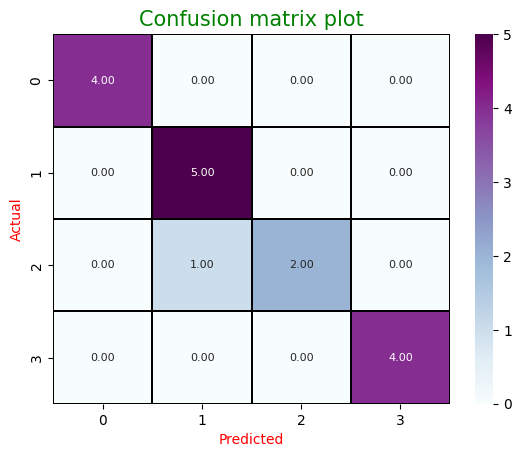

In [65]:
### 3) confusion matrix:

CMS = confusion_matrix(Y_test,y_pred_svc)
print(CMS)

### plotting confusion matrix graph

sns.heatmap(CMS,annot=True,cmap='BuPu',fmt='.2f',annot_kws={'size':8},linecolor='black',linewidths=0.3)
plt.xlabel('Predicted', color = 'red', size = 10)
plt.ylabel('Actual', color = 'red', size = 10)
plt.title('Confusion matrix plot', color = 'green', size = 15)

In [66]:
###  4) MCC score:

matthews_corrcoef(Y_test,y_pred_svc)

0.9199044821572

In [67]:
### 5) Cohen Kappa score:

cohen_kappa_score(Y_test,y_pred_svc)

0.9148936170212766

### 3) Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtc = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5)

In [70]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

In [71]:
y_pred_dtc = dtc.predict(X_test)
print(y_pred_dtc)

[0 3 2 0 1 3 1 1 1 1 1 3 1 1 1 3]


In [72]:
###  Evaluation metrics for Decision Tree

In [73]:
### 1) Accuracy score:

accuracy_score(Y_test,y_pred_dtc)

0.75

In [74]:
### 2) Classification score:

print(classification_report(Y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.56      1.00      0.71         5
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         4

    accuracy                           0.75        16
   macro avg       0.89      0.71      0.72        16
weighted avg       0.86      0.75      0.73        16



[[2 2 0 0]
 [0 5 0 0]
 [0 2 1 0]
 [0 0 0 4]]


Text(0.5, 1.0, 'Confusion matrix plot')

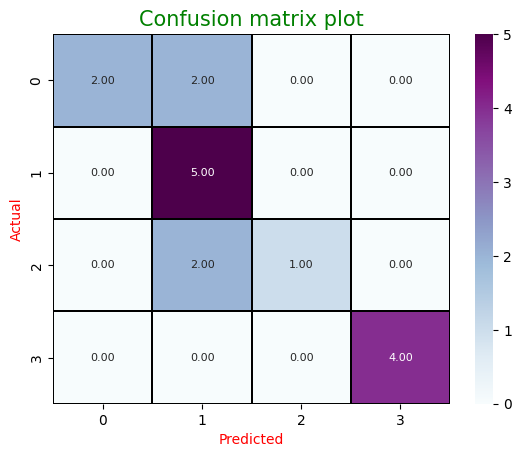

In [75]:
### 3) Confusion Matrix:

CMD = confusion_matrix(Y_test,y_pred_dtc)
print(CMD)

### plotting confusion matrix

sns.heatmap(CMD,annot=True,cmap='BuPu',fmt='.2f',annot_kws={'size':8},linecolor='black',linewidths=0.3)
plt.xlabel('Predicted', color = 'red', size = 10)
plt.ylabel('Actual', color = 'red', size = 10)
plt.title('Confusion matrix plot', color = 'green', size = 15)

In [76]:
### 6) MCC score:

matthews_corrcoef(Y_test,y_pred_dtc)

0.7015265066324012

In [77]:
### 5) Cohen Kappa Score:

cohen_kappa_score(Y_test,y_pred_dtc)

0.6521739130434783

In [78]:
### To plot the decision tree

In [79]:
arr = features.toarray()
arr = tfidf.get_feature_names_out()
print(arr)

['ab' 'abdul' 'ability' ... 'zero' 'zone' 'zp']


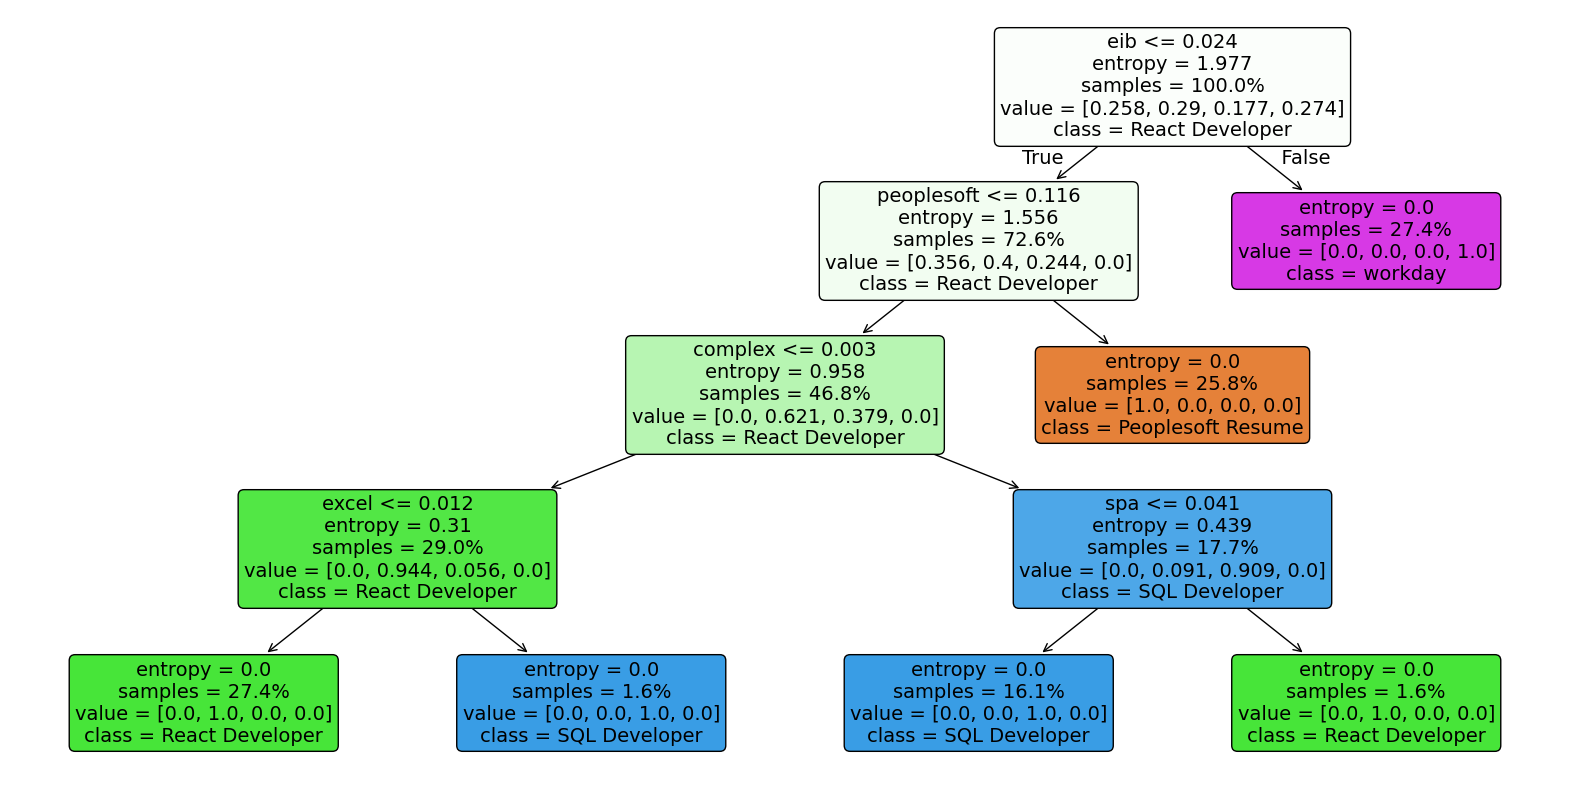

In [80]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtc,filled=True,feature_names=arr,class_names=list(df['jobrole'].unique()),rounded=True,fontsize=14,proportion=True)
plt.show()

In [81]:
### Hyper parameter tuning 

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
params = {'criterion' : ['gini','entropy'], 'splitter' : ['random','best'], 'max_depth' :range(1,10)}

In [84]:
grid_search = GridSearchCV(dtc,param_grid=params)

In [85]:
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'splitter': ['random', 'best']})

In [86]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'splitter': 'random'}

In [87]:
grid_search.best_score_

np.float64(0.9679487179487178)

### 4) Naive bayes

In [88]:
### As the target variable is multiclass (4 classes), we go for multinomialNB()

In [89]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [90]:
mnb = MultinomialNB(alpha=1.0,fit_prior=True)

In [91]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [92]:
y_pred_mnb = mnb.predict(X_test)
print(y_pred_mnb)

[0 3 2 0 2 3 1 1 1 0 1 3 1 0 1 3]


In [93]:
###  Evaluation metrics for Naive Bayes

In [94]:
###  1) Testing Accuracy score:

accuracy_score(Y_test,y_pred_mnb)

0.9375

In [95]:
###  2) Classification report:

print(classification_report(Y_test,y_pred_mnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



[[4 0 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


Text(0.5, 1.0, 'Confusion matrix plot')

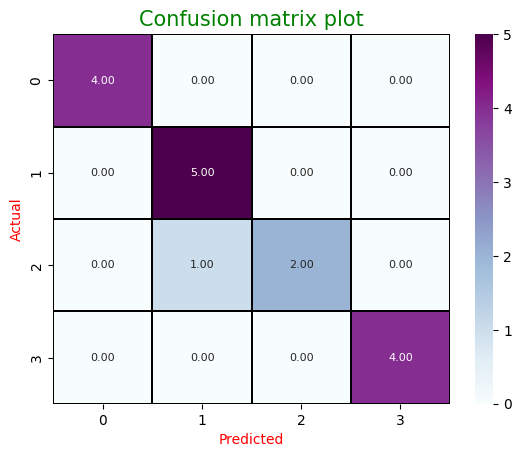

In [96]:
###  3) Confusion matrix

CMN = confusion_matrix(Y_test,y_pred_mnb)
print(CMN)

### plotting confusion matrix

sns.heatmap(CMN,annot=True,cmap='BuPu',fmt='.2f',annot_kws={'size':8},linecolor='black',linewidths=0.3)
plt.xlabel('Predicted', color = 'red', size = 10)
plt.ylabel('Actual', color = 'red', size = 10)
plt.title('Confusion matrix plot', color = 'green', size = 15)

In [97]:
### 4) MCC score:

matthews_corrcoef(Y_test,y_pred_mnb)

0.9199044821572

In [98]:
### 5) Cohen Kappa score:

cohen_kappa_score(Y_test,y_pred_mnb)

0.9148936170212766

### 5) Gradient Boosting

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
grad_boost = GradientBoostingClassifier(n_estimators=80,learning_rate=0.01,max_features=0.9,subsample=1,random_state=50)

In [101]:
grad_boost.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.01, max_features=0.9,
                           n_estimators=80, random_state=50, subsample=1)

In [102]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
y_pred_grad = grad_boost.predict(X_test)
print(y_pred_grad)

[0 3 2 0 2 3 1 1 1 0 2 3 1 0 1 3]


In [104]:
accuracy_score(Y_test,y_pred_grad)

1.0

In [105]:
###  2) classification report:

print(classification_report(Y_test,y_pred_mnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



[[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(0.5, 1.0, 'Confusion matrix plot')

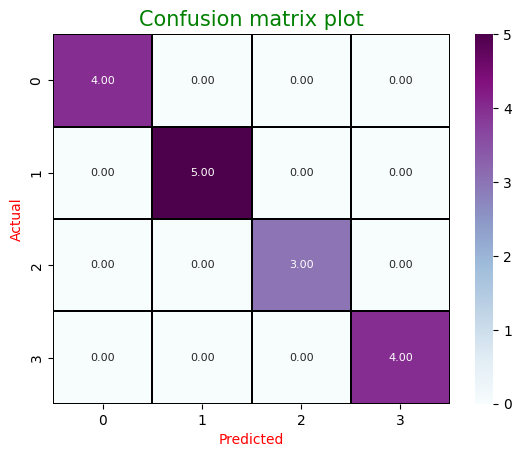

In [106]:
### 3) Confusion matrix:

CMG = confusion_matrix(Y_test,y_pred_grad)
print(CMG)

### plotting confusion matrix

sns.heatmap(CMG,annot=True,cmap='BuPu',fmt='.2f',annot_kws={'size':8},linecolor='black',linewidths=0.3)
plt.xlabel('Predicted', color = 'red', size = 10)
plt.ylabel('Actual', color = 'red', size = 10)
plt.title('Confusion matrix plot', color = 'green', size = 15)

In [107]:
### 4) MCC score:

matthews_corrcoef(Y_test,y_pred_grad)

1.0

In [108]:
### 5) Cohen Kappa score:

cohen_kappa_score(Y_test,y_pred_grad)

1.0

### 6) Neural Networks

In [109]:
### pip install --force-reinstall numpy==1.26.4 tensorflow==2.19.

In [116]:
import keras
import tensorflow as tf
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.models import Sequential

In [117]:
78*2/3+4

56.0

In [118]:
60

60

In [119]:
60*2/3+4

44.0

In [120]:
features.shape

(78, 3883)

In [121]:
epochs = 10
batch_size = 16
n_classes = 4

In [122]:
NN = Sequential()
NN.add(Dense(61,activation='relu',input_shape=(features.shape[1],)))
NN.add(Dense(50,activation='relu'))
NN.add(Dense(n_classes,activation='softmax'))
NN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 61)             │       236,924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,228 (938.39 KB)

 Trainable params: 240,228 (938.39 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
### Model Compilation

NN.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

In [124]:
###  Model validation

evaluation = NN.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,Y_test))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.2624 - loss: 1.3845 - val_accuracy: 0.6250 - val_loss: 1.3603
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9151 - loss: 1.3383 - val_accuracy: 0.8750 - val_loss: 1.3233
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9244 - loss: 1.2829 - val_accuracy: 0.9375 - val_loss: 1.2661
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 1.1980 - val_accuracy: 0.9375 - val_loss: 1.1884
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 1.0910 - val_accuracy: 0.9375 - val_loss: 1.0922
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 0.9630 - val_accuracy: 0.9375 - val_loss: 0.9830
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 1.0000 - loss: 0.8280 - val_accuracy: 0.9375 - val_loss: 0.8661
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.6760 - val_accuracy: 0.9375 - val_loss: 0.7487

In [125]:
val_loss,val_accuracy = NN.evaluate(X_test,Y_test)
print('val_loss',val_loss)
print('val_accuracy',val_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.9375 - loss: 0.5349
val_loss 0.5348891019821167
val_accuracy 0.9375


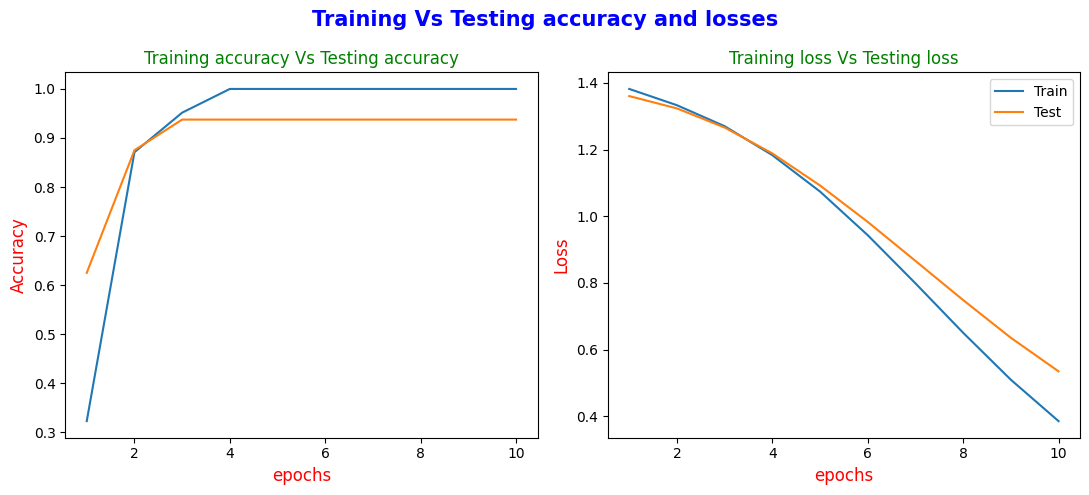

In [126]:
fig,axes = plt.subplots(1,2,figsize=(11,5))
plt.suptitle('Training Vs Testing accuracy and losses', color='blue',size=15,fontweight='bold')
axes[0].plot(range(1,11),evaluation.history['accuracy'],label='Train')
axes[0].plot(range(1,11),evaluation.history['val_accuracy'],label='Test')
axes[0].set_title('Training accuracy Vs Testing accuracy', color='green') 
axes[0].set_xlabel('epochs',color='red',size=12)
axes[0].set_ylabel('Accuracy',color='red',size=12)
axes[1].plot(range(1,11),evaluation.history['loss'],label='Train')
axes[1].plot(range(1,11),evaluation.history['val_loss'],label='Test')
axes[1].set_title('Training loss Vs Testing loss', color='green') 
axes[1].set_xlabel('epochs',color='red',size=12)
axes[1].set_ylabel('Loss',color='red',size=12)
plt.tight_layout()
plt.legend()

In [127]:
y_pred_ann = NN.predict(X_test)
print(y_pred_ann)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
[[0.7092448  0.07098866 0.08940319 0.13036343]
 [0.12731546 0.0638725  0.09967001 0.70914197]
 [0.12869364 0.21541375 0.41194463 0.24394795]
 [0.75560427 0.05960084 0.0682961  0.11649881]
 [0.1348358  0.26269886 0.40903127 0.19343397]
 [0.10800637 0.05113757 0.09175537 0.7491007 ]
 [0.11353566 0.6281452  0.13468118 0.12363803]
 [0.08695608 0.6531028  0.14863567 0.11130551]
 [0.18856613 0.4302287  0.19286838 0.18833673]
 [0.59514236 0.10837336 0.09954067 0.19694367]
 [0.184037   0.3467186  0.2534969  0.21574748]
 [0.10392804 0.0480635  0.09151638 0.7564921 ]
 [0.14848988 0.54387724 0.15347251 0.1541603 ]
 [0.64111    0.09293451 0.10419545 0.16176009]
 [0.05425461 0.8010413  0.08180263 0.06290139]
 [0.11210765 0.06357814 0.11306281 0.71125144]]


In [128]:
y_pred_ann_prob = np.argmax(y_pred_ann,axis=1)
print(y_pred_ann_prob)

[0 3 2 0 2 3 1 1 1 0 1 3 1 0 1 3]


In [129]:
### Evaluation metrics for Neural networks

In [130]:
### 1) Accuracy score:

accuracy_score(Y_test,y_pred_ann_prob)

0.9375

In [131]:
### 2) Classification report:

print(classification_report(Y_test,y_pred_ann_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



[[4 0 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


Text(0.5, 1.0, 'Confusion matrix plot')

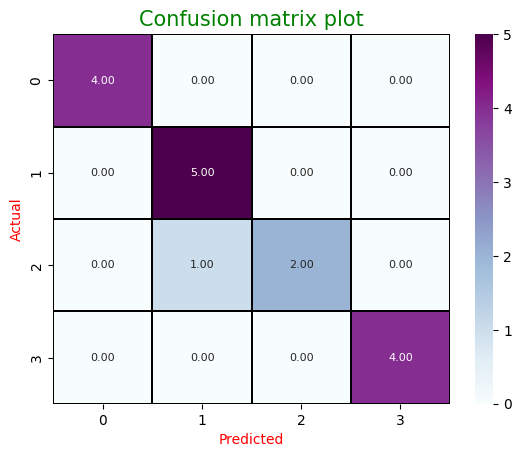

In [132]:
### 3) Confusion matrix:

CMNN = confusion_matrix(Y_test,y_pred_ann_prob)
print(CMNN)

### plotting confusion matrix

sns.heatmap(CMNN,annot=True,cmap='BuPu',fmt='.2f',annot_kws={'size':8},linecolor='black',linewidths=0.3)
plt.xlabel('Predicted', color = 'red', size = 10)
plt.ylabel('Actual', color = 'red', size = 10)
plt.title('Confusion matrix plot', color = 'green', size = 15)

###  cross_val_Score

In [133]:
# def neural_networks():
#     NN = Sequential()
#     NN.add(Dense(61,activation='relu',input_shape=(features.shape[1],)))
#     NN.add(Dense(50,activation='relu'))
#     NN.add(Dense(n_classes,activation='sigmoid'))
#     NN.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#     return NN
# NN_model = KerasClassifier(model=neural_networks,epochs=10,batch_size=15,verbose=1) 
models = {'knn' : KNeighborsClassifier(), 'svc' : SVC(),
          'dtc' : DecisionTreeClassifier(), 'mnb' : MultinomialNB(),
          'grad_boost' : GradientBoostingClassifier()}
CV_results = {}
for name,model in models.items():
    scores = cross_val_score(model, features, target, scoring='accuracy', cv=5)
    CV_results[name] = scores.mean()
    print(f"{name} Cross Validation Accuracy : {scores.mean():.2f}") 

knn Cross Validation Accuracy : 0.99
svc Cross Validation Accuracy : 0.95
dtc Cross Validation Accuracy : 1.00
mnb Cross Validation Accuracy : 0.95
grad_boost Cross Validation Accuracy : 1.00


In [140]:
model.to_csv('Resume.csv',index=False)

### Model Deployment

In [141]:
import pickle

In [142]:
file1 = 'knn.pkl'

In [143]:
file2 = 'tfidf.pkl'

In [144]:
file3 = 'le.pkl'

In [145]:
pickle.dump((knn),open(file1,'wb'))

In [146]:
pickle.dump((tfidf),open(file2,'wb'))

In [147]:
pickle.dump((le),open(file3,'wb'))